In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# ***MD: TAMIM HASAN
#     ID:181-35-2432***

In [2]:
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#traind data
train = pd.read_csv('../input/digit-recognizer/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#test data
test = pd.read_csv('../input/digit-recognizer/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#train shape
train.shape

(42000, 785)

In [6]:
#test shape
test.shape

(28000, 784)

In [7]:
x = train.drop(['label'],axis=1)
X = np.array(x).reshape(len(train),28*28) / 255
X.shape

(42000, 784)

In [8]:
y = train['label']
y.shape

(42000,)

In [9]:
x_test = np.array(test).reshape(len(test),28*28) / 255
x_test.shape

(28000, 784)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.15,random_state=42)

In [11]:
X_train.shape, y_train.shape

((35700, 784), (35700,))

In [12]:
X_val.shape, y_val.shape

((6300, 784), (6300,))

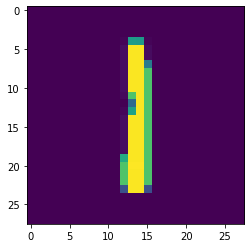

In [13]:
plt.imshow(X[2].reshape(28,28))

In [14]:
y[2]

1

In [15]:
#Simple neural network with no hidden layers
ann =keras.Sequential([
     keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
ann.compile(
             optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=20)

Epoch 1/20
1116/1116 [==============================] - 2s 1ms/step - loss: 0.8708 - accuracy: 0.7666
Epoch 2/20
1116/1116 [==============================] - 1s 1ms/step - loss: 0.3356 - accuracy: 0.9088
Epoch 3/20
1116/1116 [==============================] - 1s 1ms/step - loss: 0.2916 - accuracy: 0.9185
Epoch 4/20
1116/1116 [==============================] - 1s 1ms/step - loss: 0.2687 - accuracy: 0.9245
Epoch 5/20
1116/1116 [==============================] - 1s 1ms/step - loss: 0.2754 - accuracy: 0.9213
Epoch 6/20
1116/1116 [==============================] - 1s 1ms/step - loss: 0.2597 - accuracy: 0.9283
Epoch 7/20
1116/1116 [==============================] - 1s 1ms/step - loss: 0.2524 - accuracy: 0.9292
Epoch 8/20
1116/1116 [==============================] - 1s 1ms/step - loss: 0.2523 - accuracy: 0.9286
Epoch 9/20
1116/1116 [==============================] - 1s 1ms/step - loss: 0.2433 - accuracy: 0.9321
Epoch 10/20
1116/1116 [==============================] - 1s 1ms/step - loss: 0.242

In [18]:
ann.evaluate(X_val,y_val)

197/197 [==============================] - 0s 881us/step - loss: 0.2805 - accuracy: 0.9194


[0.28045064210891724, 0.9193651080131531]

In [20]:
y_predict = ann.predict(X_val)
y_predict

array([[4.9513578e-04, 9.3308359e-02, 6.3120389e-01, ..., 1.5357711e-05,
        9.6136260e-01, 5.3398013e-03],
       [4.4228585e-05, 9.9851447e-01, 7.0262659e-01, ..., 2.8849581e-01,
        5.7007098e-01, 8.4645391e-02],
       [3.1856123e-06, 5.5711771e-06, 1.9127205e-05, ..., 8.0711496e-01,
        1.6480461e-01, 9.9537504e-01],
       ...,
       [5.1358342e-04, 3.4621365e-08, 6.3893974e-02, ..., 1.0248693e-05,
        7.5789576e-05, 2.3898792e-07],
       [1.5429527e-02, 2.6693940e-04, 1.8641567e-05, ..., 2.8952956e-04,
        3.6770156e-01, 7.5194240e-04],
       [9.9998820e-01, 1.4320829e-13, 1.8277436e-02, ..., 1.3379912e-07,
        8.2962453e-02, 8.0321715e-06]], dtype=float32)

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[0]

8

Text(51.0, 0.5, 'Truth')

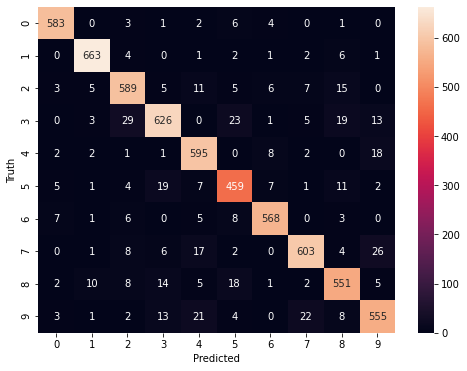

In [22]:
cn = tf.math.confusion_matrix(y_val,y_predicted_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cn,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
#Using hidden layer
ann_hidden =keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
ann_hidden.compile(
             optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann_hidden.fit(X_train,y_train,epochs=20)

Epoch 1/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.5545 - accuracy: 0.8480
Epoch 2/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.1535 - accuracy: 0.9529
Epoch 3/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.1042 - accuracy: 0.9697
Epoch 4/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0756 - accuracy: 0.9779
Epoch 5/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0572 - accuracy: 0.9836
Epoch 6/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0483 - accuracy: 0.9854
Epoch 7/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0385 - accuracy: 0.9889
Epoch 8/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0286 - accuracy: 0.9923
Epoch 9/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0249 - accuracy: 0.9927
Epoch 10/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.017

In [24]:
ann_hidden.evaluate(X_val,y_val)

197/197 [==============================] - 0s 1ms/step - loss: 0.1526 - accuracy: 0.9697


[0.15261058509349823, 0.969682514667511]

In [25]:
y_predict = ann_hidden.predict(X_val)
y_predict

array([[6.4549357e-02, 2.9582896e-05, 4.5390725e-03, ..., 5.7821899e-06,
        9.9999845e-01, 4.6941638e-04],
       [3.9176613e-09, 9.9997014e-01, 9.1435015e-03, ..., 2.7869922e-01,
        2.5128782e-01, 3.6495924e-04],
       [3.6086903e-10, 1.6136255e-05, 9.2175170e-11, ..., 1.1985275e-01,
        7.2532892e-04, 9.9999940e-01],
       ...,
       [5.0290406e-02, 2.2070409e-15, 7.4248959e-08, ..., 7.9749594e-09,
        2.2590160e-04, 2.0828462e-07],
       [1.0351667e-05, 8.3023751e-06, 1.9022846e-10, ..., 6.6409470e-05,
        1.1477739e-02, 6.0849487e-08],
       [1.0000000e+00, 2.9223729e-10, 2.9157284e-06, ..., 4.9838424e-04,
        1.5276705e-06, 5.6518206e-07]], dtype=float32)

In [26]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[2]

9

Text(51.0, 0.5, 'Truth')

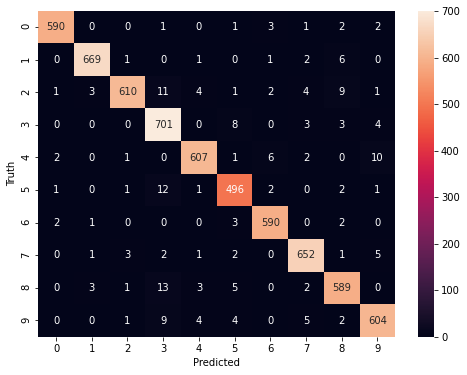

In [27]:
cn = tf.math.confusion_matrix(y_val,y_predicted_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
#Flatten Layer
ann_flat = keras.Sequential([
           keras.layers.Flatten(input_shape=(28,28)),
           keras.layers.Dense(100, activation='relu'),
           keras.layers.Dense(10, activation='sigmoid')
])
ann_flat.compile(
             optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann_flat.fit(X_train,y_train,epochs=20)

Epoch 1/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.5683 - accuracy: 0.8345
Epoch 2/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.1625 - accuracy: 0.9517
Epoch 3/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.1109 - accuracy: 0.9671
Epoch 4/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0790 - accuracy: 0.9780
Epoch 5/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0577 - accuracy: 0.9831
Epoch 6/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0496 - accuracy: 0.9848
Epoch 7/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0388 - accuracy: 0.9890
Epoch 8/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0303 - accuracy: 0.9918
Epoch 9/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0234 - accuracy: 0.9938
Epoch 10/20
1116/1116 [==============================] - 2s 2ms/step - loss: 0.019

In [29]:
ann_flat.evaluate(X_val,y_val)

197/197 [==============================] - 0s 1ms/step - loss: 0.1454 - accuracy: 0.9708


[0.14536690711975098, 0.9707936644554138]

In [30]:
y_predict = ann_hidden.predict(x_test)
y_predict

array([[5.8114065e-08, 1.0612786e-16, 1.0000000e+00, ..., 1.2831897e-02,
        6.9561225e-05, 2.4413069e-07],
       [9.9999917e-01, 1.6947174e-10, 1.0900177e-04, ..., 2.4954975e-03,
        1.4633872e-07, 1.3574435e-11],
       [2.3587652e-09, 2.3067214e-05, 1.6435981e-04, ..., 8.4772408e-03,
        8.0950886e-02, 9.9997473e-01],
       ...,
       [7.2582849e-11, 1.9101071e-06, 8.2709028e-07, ..., 2.0265414e-07,
        8.5264444e-04, 2.6067144e-01],
       [9.2139061e-07, 2.8336970e-11, 8.0456175e-10, ..., 4.8227012e-03,
        5.8090434e-05, 9.9999893e-01],
       [2.5262936e-09, 1.3569411e-15, 1.0000000e+00, ..., 9.0102141e-05,
        2.3439856e-05, 2.1839869e-05]], dtype=float32)

In [31]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[2]

9

In [32]:
#Using CNN
cnn = keras.Sequential([
    keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
 
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [35]:
cnn.compile(
             optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [36]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(35700, 28, 28, 1)

In [37]:
x_test = x_test.reshape(-1,28,28,1)
x_test.shape

(28000, 28, 28, 1)

In [38]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1116/1116 [==============================] - 12s 10ms/step - loss: 0.3925 - accuracy: 0.8806
Epoch 2/20
1116/1116 [==============================] - 11s 10ms/step - loss: 0.0679 - accuracy: 0.9794
Epoch 3/20
1116/1116 [==============================] - 11s 10ms/step - loss: 0.0401 - accuracy: 0.9881
Epoch 4/20
1116/1116 [==============================] - 12s 10ms/step - loss: 0.0249 - accuracy: 0.9927
Epoch 5/20
1116/1116 [==============================] - 11s 10ms/step - loss: 0.0165 - accuracy: 0.9950
Epoch 6/20
1116/1116 [==============================] - 12s 10ms/step - loss: 0.0113 - accuracy: 0.9970
Epoch 7/20
1116/1116 [==============================] - 11s 10ms/step - loss: 0.0095 - accuracy: 0.9972
Epoch 8/20
1116/1116 [==============================] - 11s 10ms/step - loss: 0.0078 - accuracy: 0.9972
Epoch 9/20
1116/1116 [==============================] - 11s 10ms/step - loss: 0.0069 - accuracy: 0.9978
Epoch 10/20
1116/1116 [==============================] - 11s 10m

In [39]:
y_predict_final = cnn.predict(x_test)

In [40]:
y_predicted_labels_final =[np.argmax(i) for i in y_predict_final]

In [41]:
image_id = range(1, y_predict_final.shape[0] + 1)
submission_file = pd.DataFrame({'ImageId':image_id, 'Label':y_predicted_labels_final})
submission_file.to_csv('digit_recognizer_submission_final_cnn_ann.csv',index=False)

In [42]:
submission_file.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
